# **STAT 301 Project**


In [2]:
library(broom)
library(latex2exp)
library(tidymodels)
library(repr)
library(gridExtra)
library(faraway)
library(mltools)
library(leaps)
library(glmnet)
library(cowplot)
library(tidyverse)
library(modelr)

── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ dials        1.2.1     ✔ rsample      1.2.1
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.5.1     ✔ tidyr        1.3.1
✔ infer        1.0.7     ✔ tune         1.2.1
✔ modeldata    1.4.0     ✔ workflows    1.1.4
✔ parsnip      1.2.1     ✔ workflowsets 1.1.0
✔ purrr        1.0.2     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Use tidymodels_prefer() to resolve common conflicts.


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘mltools’


The following objects are masked from ‘package:yardstick’:

    mcc, rmse


The following object is masked from ‘package:tidyr’:

    rep

In [3]:
dataset <- read.csv("adult.data", header = FALSE) #no column names so creat column names manually
colnames(dataset) <- c("Age", "Work_Class", "Final_weight", "Education", 
                       "Education_Num", "Marital_Status", "Occupation",
                       "Relationship", "Race", "Sex",
                       "Capital_Gain", "Capital_Loss", 
                       "Hrs_per_week", "Country", "Income"
                      ) 

In [4]:
head(dataset)

,Age,Work_Class,Final_weight,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hrs_per_week,Country,Income
,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
6,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
nrow(dataset)

[1] 32561

### **Data Description:**

Dataset: Census income data (from UC irvine machine learning repository)

link: https://archive.ics.uci.edu/dataset/2/adult

This data set contains Adult census data collected in 1994 by the U.S. Census Bureau in 1994and extracted by Barry Becker from the 1994 census database and compile along with Ronny Kohavi and made publicly available through the UC irvine machine learing repository. This dataset contains about variables all of which focus on the demographic details(continuous or categorical) of each individual and 1 variable which focus on wether or not their annual income exceeds 50k. These variables include: Age, work class, final weight, Education, Education number, marital status, Occupation, relationship, Race, Sex, captial gain, Capital loss, Hours per week, Country of origin and income. This data set is typically used to predict wether or not annual income exceeds 50K based on demographic details of an individual. 

Observations: 32561

- Age(continuous): Age of the individual over 18 etc
- Work Class(categorical): Type of employer, ie private, government or self employed etc
- final weight(continuous): number of people the census believes represents by this individual etc
- Education(categorical):highest education level, ie high school or bachelors etc
- Education Number(continuous): Numerical encoding educational level etc
- marital status(categorical): marital status of individual, ie Divorced, Married civilian spouse, never Married etc 
- Occupation(categorical): Job the individual occupies, ie tech support, craft repair etc
- Relationship(categorical): family relationship, ie Husband, Wife or Not in family etc
- Race(categorical): Race, ie Black white or hispanic etc
- Sex(categorical): Gender, female or Male
- Capital Gain(continuous):Income from investment sources excluding wages
- Capital Loss(continuous):Losses from investment sources excluding wages
- Hours per week(continuous): hours per week worked
- Country of origin(categorical): country of origin, ie United States, Cuba, Mexico ie
- income(binary target): income level divide by 50K=> or > 50K



### **Question:**

Does an individuals country of origin affect whether or not an individual's annual income is more or less than $50,000?

Explanatory Variable: Country of origin

Response Variable: Income

This question is primarily on inference rather than a prediction as we are investigating the relationship between country of origin and annual income. This question aims to analyze if and how does the country of origin affect the Annual income, specifically whether or not an individual earns over 50K or not. By investigating this we can may possibly indicate the socio-economic patterns across other countries. Th dataset provides a native country variable along with other demograohic details which may help us answer this question. By exploring how an individuals country of origin is related to income, we can investigate if certain countries are associated with higher or lower income categories. Another way to answer this question is to see the proportion of those who have income over $50,000 so as to determine if certain origins are associated with higher or lower income categories in terms of percentage



### **visualization:**

In [6]:
data <- dataset %>%
select(Income, Country) %>%
mutate(income = trimws(Income))%>% #remove any spaces
mutate(above50K = ifelse(income == ">50K", 1, 0))%>%
select(-Income)


head(data, 3)


,Country,income,above50K
,<chr>,<chr>,<dbl>
1,United-States,<=50K,0
2,United-States,<=50K,0
3,United-States,<=50K,0


In [7]:
plotdata <- data %>%
group_by(Country) %>%
summarise(prop = mean(above50K))

head(plotdata)

Country,prop
<chr>,<dbl>
?,0.25042882
Cambodia,0.36842105
Canada,0.32231405
China,0.26666667
Columbia,0.03389831
Cuba,0.26315789


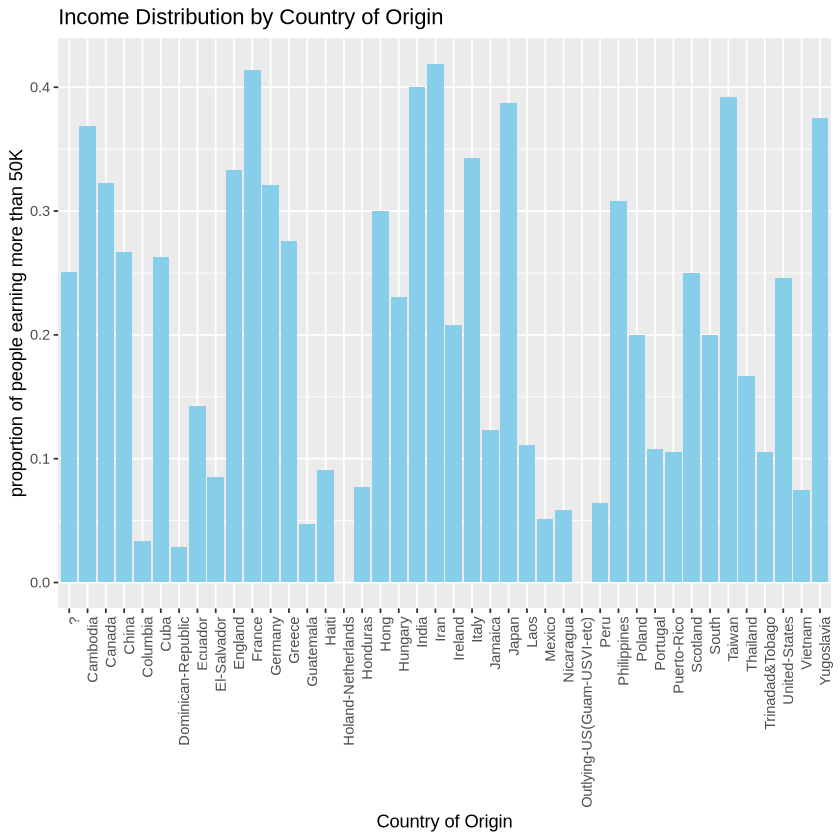

In [8]:

plot <- plotdata %>%
ggplot( aes(x = Country, y = prop)) +
   geom_bar(stat = "identity", fill = "skyblue")+
  labs(title = "Income Distribution by Country of Origin",
       x = "Country of Origin",
       y = "proportion of people earning more than 50K") +
 theme(axis.text.x = element_text(angle = 90, hjust = 1))
  
plot

This bar plot allows us to see the proportion of inddividuals who's annual income is greater than 50K within each country of origin. This visualization would allow us to observe whether the proportion of high earners varies by country. This plot will help answer my quesion as through the use of proportions we can determine if an individual will be earning more than 50K relative to the country they are originally from. 

### **Proposed method**

To effectively address the Question, "Does an individual's country of origin affect whether or not an individual's annual income is more or less than $50,000?" It is recommended that we should employ logistic regression. This method is appropriate due to the dependent variable being able to be converted into a binary response variable, with the integer 1 representing the salary exceeding 50k, 0 otherwise. Thus making this an ideal use for logistic regression to model probabilities of outcomes based on predictor variables like country of origin and other covariates.

Before continuing with the analysis, various required assumptions need to be made regarding the logistic regression model. One such assumption is that the log odds of the dependent variable must be linearly related to the independent variables, as if this assumption is violated it would lead to Biased estimates and poor prediction. Another assumption is that the observations are independent of one another as it will also lead to bad estimates. No multicollinearity is also required and a sufficient sample size will be needed in order to produce stable estimates. 


Despite the benefits of a logistic regression model, there are potential limitations that may lead to inaccurate results. If there is a significant imbalance between the proportion of individuals earning above than below 50K, the model may struggle to estimate the minority class accurately. Due to the country of origin being a categorical variable with many levels, may lead to sparsity in some categories. Some variables may also heavily influence income such as industry and experience, and if these variables are not included the model may yield biased estimates. 

To effectively address these limitations it may be beneficial to add a few more variables to the model to assist with the estimates. It is recommended that the variables, Education number and hours per week should be added to the model along with Country of origin as those two should theoretically affect an individuals salary. It is also confirmed from the website where the dataset originated, that those two variables do not have nay missing values thus allowing us to make more precise estimates. It is also recommended to select 2 random countries and compare those two to address the sparsity in some categories. 2 countries that will be selected are Italy and Japan as those two will represent two different continents. These 2 countries will be selected into our model. 



In [9]:
newdata <- dataset %>%
  mutate(income = trimws(Income), Country = trimws(Country))%>% #remove any spaces
  mutate(Income_Binary = ifelse(income == ">50K", 1, 0)) %>%
  filter(Country %in% c( "Italy", "Japan")) %>%
  mutate(across(c(Country, Education, Occupation), ~ as.factor(.)))


head(newdata)
nrow(newdata)

,Age,Work_Class,Final_weight,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hrs_per_week,Country,Income,income,Income_Binary
,<int>,<chr>,<int>,<fct>,<int>,<chr>,<fct>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<fct>,<chr>,<chr>,<dbl>
1,19,?,170653,HS-grad,9,Never-married,?,Own-child,White,Male,0,0,40,Italy,<=50K,<=50K,0
2,47,Self-emp-not-inc,93208,HS-grad,9,Married-civ-spouse,Other-service,Wife,White,Female,0,0,75,Italy,<=50K,<=50K,0
3,41,Private,198316,Some-college,10,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,Japan,<=50K,<=50K,0
4,53,Private,288020,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,Japan,<=50K,<=50K,0
5,29,Private,419721,HS-grad,9,Never-married,Other-service,Unmarried,Black,Female,0,0,40,Japan,<=50K,<=50K,0
6,51,Private,203435,Some-college,10,Divorced,Sales,Unmarried,White,Female,0,0,40,Italy,<=50K,<=50K,0


[1] 135

Since the number of observations is 135, this will be a sufficient sample size to satisfy one of our assumptions.

In [11]:
logit_model <- glm(
  Income_Binary ~ Country + Hrs_per_week + Education_Num ,
  data = newdata,
  family = binomial
)
logit_model


Call:  glm(formula = Income_Binary ~ Country + Hrs_per_week + Education_Num, 
    family = binomial, data = newdata)

Coefficients:
  (Intercept)   CountryJapan   Hrs_per_week  Education_Num  
     -5.38900       -0.50387        0.03865        0.32140  

Degrees of Freedom: 134 Total (i.e. Null);  131 Residual
Null Deviance:	    176.9 
Residual Deviance: 147.3 	AIC: 155.3

In [12]:
summary(logit_model)


Call:
glm(formula = Income_Binary ~ Country + Hrs_per_week + Education_Num, 
    family = binomial, data = newdata)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -5.38900    1.13768  -4.737 2.17e-06 ***
CountryJapan  -0.50387    0.41803  -1.205   0.2281    
Hrs_per_week   0.03865    0.01558   2.481   0.0131 *  
Education_Num  0.32140    0.07817   4.111 3.93e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 176.88  on 134  degrees of freedom
Residual deviance: 147.30  on 131  degrees of freedom
AIC: 155.3

Number of Fisher Scoring iterations: 4


In [13]:
logit_model_results <- logit_model%>%
tidy(conf.int = 0.95)

logit_model_results

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-5.38899798,1.1376793,-4.736834,2.170827e-06,-7.792200077,-3.31686721
CountryJapan,-0.50387377,0.4180255,-1.205366,2.280620e-01,-1.341820426,0.30439999
Hrs_per_week,0.03864669,0.0155791,2.480675,1.311339e-02,0.009355639,0.07107653
Education_Num,0.32140024,0.0781726,4.111418,3.932362e-05,0.178167681,0.48630655


### **Interpretation**

Based on the results of our model, under a significance level of 0.05, it would appear that both hours worked per week and the Education number significantly increases the likelihood of earning a salary more than 50 k with each additional hour and year raising the log-odds of a higher income. However the country of origin, Japan, was not a significant factor in this particular model, suggesting that there are no substantial difference in income likelihood from individuals from Japan, than those from Italy. This seems to be consistent as the Education and hours worked per week typically have a larger impact on salary than than ones nationality. This addresses the Question of interests as it allowed us to see if a persons country impacts the likelihood of earning a salary over 50K, particularily those from Italy and Japan, to investigate more countries we can randomly select two other countries . 